# 선형모델
- 데이터를 확인하고 그것과 관련된 선을 찾는 알고리즘
- 분류 : 경계선을 찾는다.
- 회귀 : 예측선을 찾는다.

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = 20 ,10
plt.rcParams["axes.unicode_minus"] = False
# %matplotlib notebook

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 분류

### 데이터 준비

In [5]:
df1 = pd.read_csv("data/diabetes_train.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0
598,1,173,74,0,0,36.8,0.088,38,1


### 데이터 전처리

In [7]:
# 입력과 결과로 나눈다
X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]

display(X)
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22
596,0,67,76,0,0,45.3,0.194,46
597,1,89,24,19,25,27.8,0.559,21
598,1,173,74,0,0,36.8,0.088,38


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [8]:
# 인코딩은 할 필요가 없다.

In [9]:
# 입력 데이터에 대한 표준화
scaler1 = StandardScaler()
scaler1.fit(X)

X = scaler1.transform(X)
X

array([[ 0.64896283,  0.85394206,  0.17154252, ...,  0.21175498,
         0.43304279,  1.41559569],
       [-0.83948403, -1.0767362 , -0.13862979, ..., -0.66292137,
        -0.38594131, -0.19287544],
       [ 1.24434157,  1.92654109, -0.24202057, ..., -1.07526879,
         0.56657281, -0.10821907],
       ...,
       [-0.83948403, -0.95415345, -2.30983602, ..., -0.51297685,
         0.2312641 , -1.0394392 ],
       [-0.83948403,  1.62008422,  0.2749333 , ...,  0.61160703,
        -1.16635008,  0.39971919],
       [-0.83948403, -0.34123972, -1.58610061, ..., -1.10025955,
        -0.21977063, -0.61615732]])

### 기본 모델 사용
- LogisticRegression : 경계선과 가장 가까운 데이터와의 거리가 가장 가까울 수 있도록 경계선을 찾는다.
- SVM(SVC) : 경계선과 가장 가까운 데이터와의 거리가 가장 멀 수 있도록 경계선을 찾는다.

In [25]:
model1 = LogisticRegression()

# 교차검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring="f1", cv=kfold)
print(f"평균 정확도 : {r1.mean()}")

평균 정확도 : 0.6224112881819782


In [26]:
model2 = SVC()

# 교차검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1= cross_val_score(model2, X, y , scoring="f1", cv=kfold)
print(f"평균 정확도 {r1.mean()}")

평균 정확도 0.5794236719645153


### 모델 하이퍼 파라미터 튜닝
- 아무것도 설정을 안하면 직선을 찾으려고 한다.
- 직선을 점점 곡선으로 만들기 위해 하이퍼 파라미터를 튜닝
- 규제 : 선형 모델은 직선을 찾으려고 한다. 따라서 규제를 통해 직선을 다른 형태로 변형할 수 있습니다.
- l2 규제 : 각 가중치(학습을 통해 찾아내야하는 상수들)의 제곱한 값의 합에 규제 강도를 곱한다. 규제 강도를 크게 하면 가중치가 더 많이 감소되고 규제 강도를 작게하면 가중치가 증가한다.
- l1 규제 : 각 가중치의 합에 규제 강도를 곱한다.

In [27]:
# LogisticRegression
# penalty : 규제의 종류(l1, l2, elasticNet(l1, l2 모두 사용), none)
# C: 규제의 강도
params = {
    "penalty" : ["l1", 'l2', 'elasticnet', 'none'],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model1 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring="f1", cv=kfold)
grid_clf1.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.6261550471707725


In [28]:
# SVM(SVC)
# SVM은 l2로 penalty 고정
# C: 규제의 강도
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="f1", cv=kfold)
grid_clf2.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf2.best_score_}")

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.5794236719645153


### 최적의 모델에 전체 데이터를 학습 시킨다.

In [29]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_

# SVM인 경우 확률을 찍어보기 위해선 다음과 같은 값을 설정해야 한다.
best_model2.probability = True

# 학습
best_model1.fit(X,y)
best_model2.fit(X,y)

SVC(C=1, probability=True)

### 학습한 데이터를 통해 검증을 한다

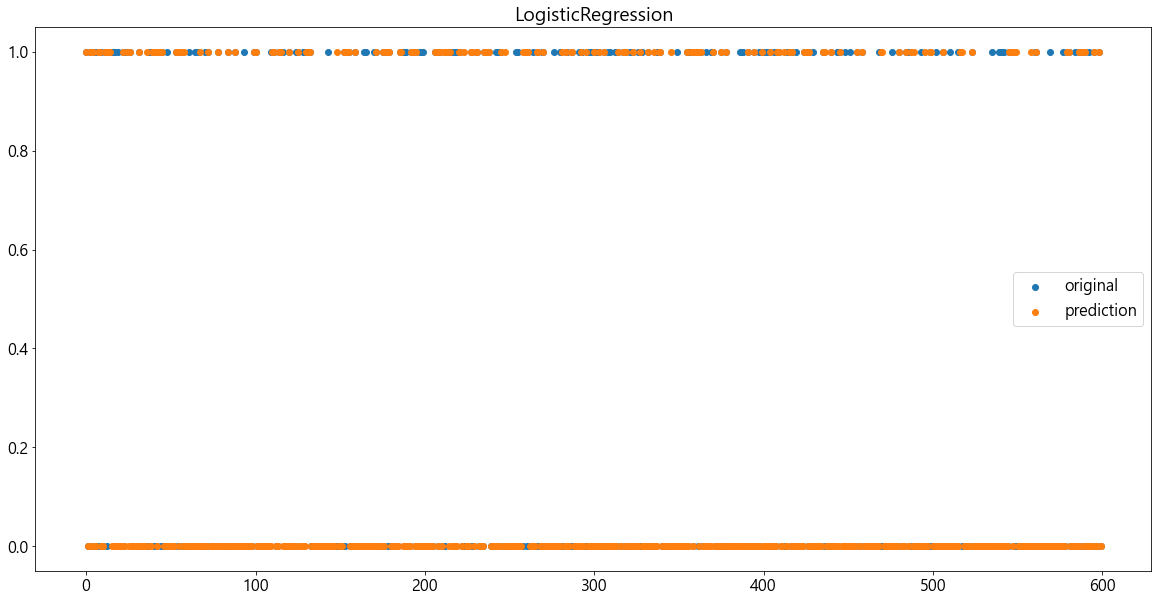

In [30]:
y_pred1 = best_model1.predict(X)

plt.scatter(list(range(len(y))), y , label="original")
plt.scatter(list(range(len(y_pred1))), y_pred1 , label="prediction")
plt.legend()
plt.title("LogisticRegression")
plt.show()

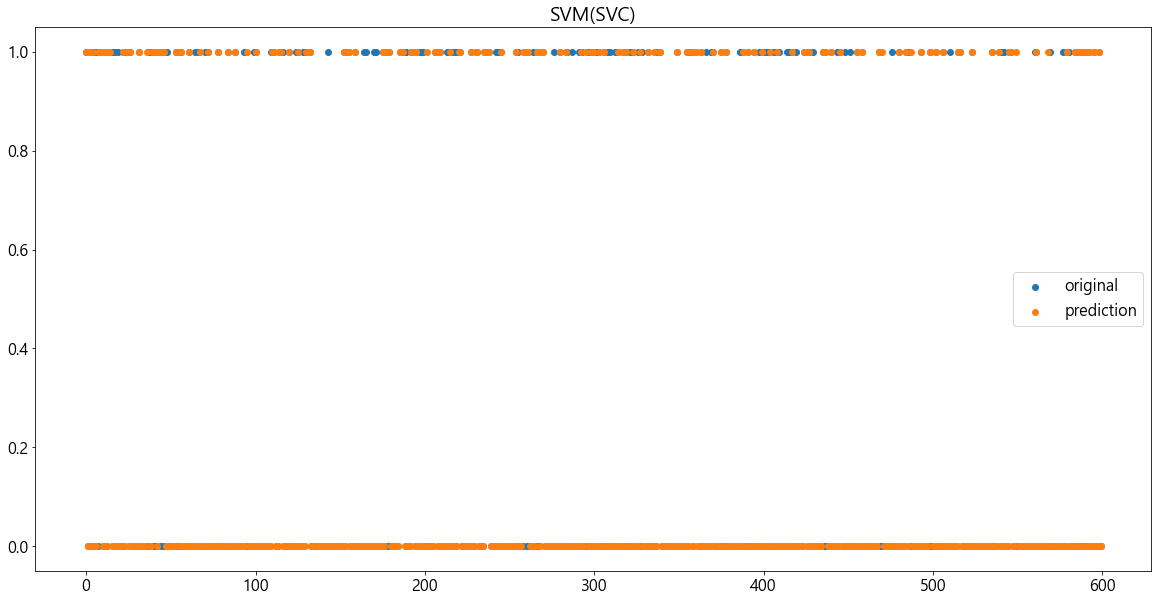

In [31]:
y_pred2 = best_model2.predict(X)

plt.scatter(list(range(len(y))), y , label="original")
plt.scatter(list(range(len(y_pred2))), y_pred2 , label="prediction")
plt.legend()
plt.title("SVM(SVC)")
plt.show()

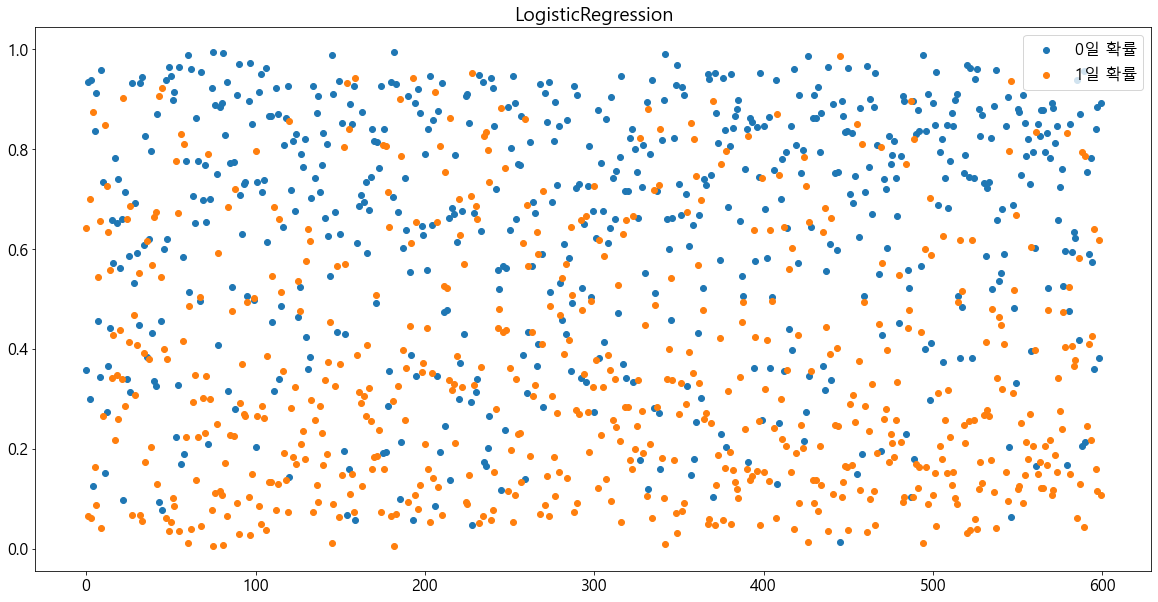

In [32]:
# 결과 확률
proba_a1 = best_model1.predict_proba(X)

# 0일 확률
a10 = proba_a1[:, 0]
# 1일 확률
a11 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일 확률")
plt.scatter(list(range(len(a11))), a11, label="1일 확률")
plt.legend()
plt.title("LogisticRegression")
plt.show()

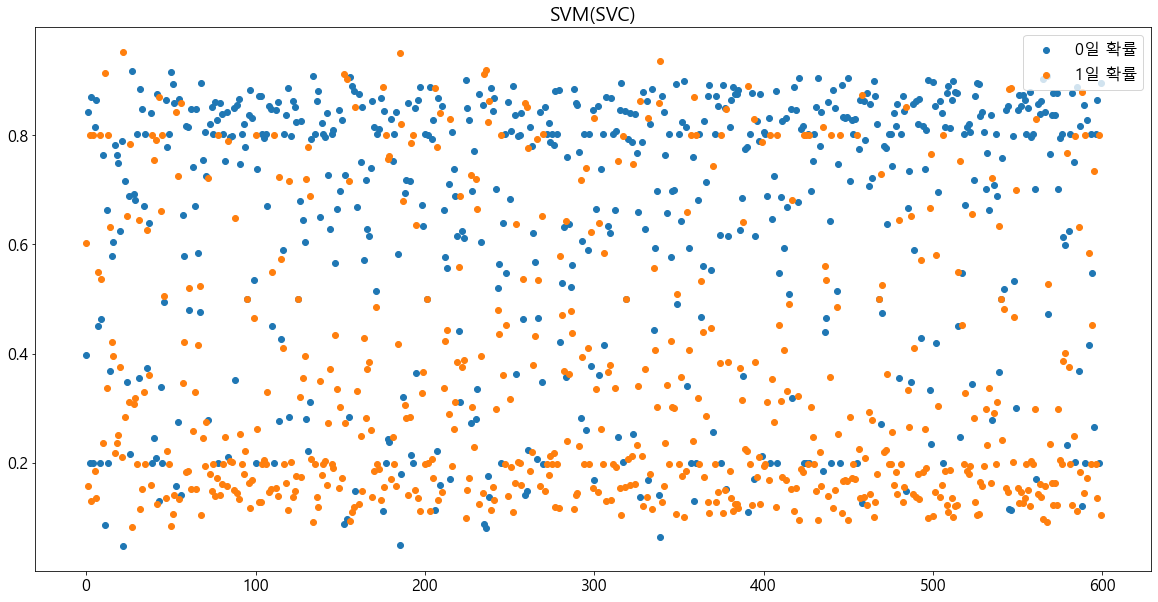

In [33]:
# 결과 확률
proba_a2 = best_model2.predict_proba(X)

# 0일 확률
a10 = proba_a2[:, 0]
# 1일 확률
a11 = proba_a2[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일 확률")
plt.scatter(list(range(len(a11))), a11, label="1일 확률")
plt.legend()
plt.title("SVM(SVC)")
plt.show()

### 새로운 데이터에 대한 예측을 수행한다.

In [35]:
df2 = pd.read_csv("data/diabetes_test.csv")
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,88,19,0,27.1,0.400,24
1,6,96,0,0,0,23.7,0.190,28
2,1,124,74,36,0,27.8,0.100,30
3,7,150,78,29,126,35.2,0.692,54
4,4,183,0,0,0,28.4,0.212,36
...,...,...,...,...,...,...,...,...
163,10,101,76,48,180,32.9,0.171,63
164,2,122,70,27,0,36.8,0.340,27
165,5,121,72,23,112,26.2,0.245,30
166,1,126,60,0,0,30.1,0.349,47
